In [214]:
# Imports

import pandas as pd
import os
import glob

#### Merge the 12 months of sales data into a single file.

In [215]:
# Take an initial look at what the data from a month looks like.

In [216]:
jan_19 = pd.read_csv('./Sales_Data/Sales_January_2019.csv')

In [217]:
feb_19 = pd.read_csv('./Sales_Data/Sales_February_2019.csv')

In [218]:
jan_19.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [219]:
feb_19.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [220]:
# How can we import all of the files from the directory at once?

files = [file for file in os.listdir('./Sales_Data')]

for csv in files:
    print(csv)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [221]:
# Concatenate these files to make one csv.

all_months = pd.DataFrame()

for csv in files:
    df = pd.read_csv('./Sales_Data/'+csv)
    all_months = pd.concat([all_months, df])

# We've now created one csv with each months data entitled all_months_data.csv.   
all_months.to_csv('all_months_data.csv', index=False)

In [222]:
data = pd.read_csv('all_months_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [223]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [224]:
# Another method given that the columns in each file are all the same...

# Resource
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

path = r'./Sales_Data'
all_files = glob.glob(os.path.join(path, '*.csv'))

df_for_each_month = (pd.read_csv(file) for file in all_files)
concatenated_df = pd.concat(df_for_each_month, ignore_index=True)

In [225]:
concatenated_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## How can we think about cleaning the data...

In [226]:
# How many null values are there in each column?

data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [227]:
# How many rows have NaN values?
# Save as a dataframe.

nan_data = data[data.isna().any(axis=1)]

row_count = nan_data.shape[0]
column_count = nan_data.shape[1]

In [228]:
nan_data.shape

(545, 6)

In [229]:
row_count

545

In [230]:
column_count

6

In [231]:
data = data.dropna(how='all')

In [232]:
# Confirm NaN values were dropped.

data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [233]:
data.shape

(186305, 6)

In [234]:
# Add a month column to the dataframe.

# Take the first two numbers of the order date to capture month.

data['Month'] = data['Order Date'].str[0:2]

In [235]:
# We can't convert month data to an integer yet.
# Find where 'Or' is appearing in the Month column.

temp_df = data[data['Month'] == 'Or']

In [236]:
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [237]:
# To filter out 'Or' using the Month columnn...

data = data[data['Month'] != 'Or']
data.shape

(185950, 7)

In [238]:
# Now convert Month column from string to integer.

data['Month'] = data['Month'].astype(int)

In [239]:
# To see the data type of a value in the Month column. Use the first
# value as an example.

type(data['Month'][0])

numpy.int64

### Question 1

#### What was the best month for sales? How much was earned that month?

In [240]:
# Convert month column from string to integer.

# Check the data types of all of the columns in the dataframe.

data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [241]:
# We'll need to convert the Quantity Ordered and Price Each columns
# data types to integers and floats respectively.

data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)

In [242]:
data['Price Each'] = data['Price Each'].astype(float)

In [243]:
# Check data types to verify changes.

data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [244]:
# Add a Sales column to the dataframe.

data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [245]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [246]:
# Now, to answer the question...

total_sales = data.groupby(['Month']).sum()

In [247]:
total_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [248]:
# Change display.

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [249]:
# Return the row with the highest number of sales. We see that the 
# month of December had the most sales.

total_sales[total_sales['Sales'] == total_sales['Sales'].max()]

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34


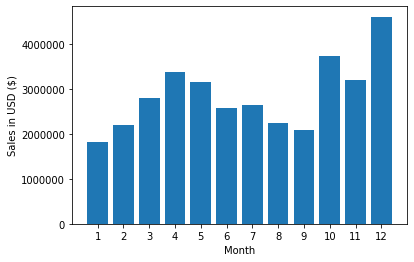

In [250]:
# How could we plot this?

import matplotlib.pyplot as plt

plt.bar(range(1, 13), total_sales['Sales'])
plt.xticks(range(1, 13))
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show();

### Question 2

#### What US city had the highest number of sales?

In [251]:
data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99


In [252]:
# Create a separate column for city in the dataframe.

data['City, State and Zipcode'] = data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2])

In [253]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,"City, State and Zipcode"
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


In [254]:
data['City'] = data['City, State and Zipcode'].apply(lambda x: x.rsplit(' ', 1)[0])

In [255]:
del data['City, State and Zipcode']

In [256]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [257]:
city_sales = data.groupby(['City']).sum()

In [258]:
city_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


In [259]:
# The city with the highest number of sales.

city_sales[city_sales['Sales'] == city_sales['Sales'].max()]

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco CA,50239,8211461.74,315520,8262203.91


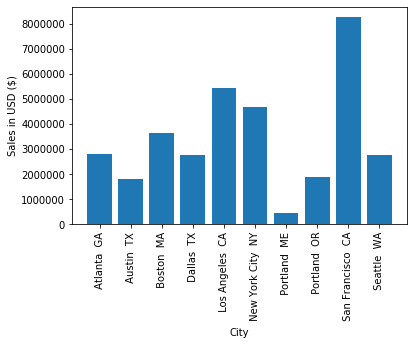

In [260]:
# How could we plot this?

import matplotlib.pyplot as plt

# Ensures x and y values stay aligned.
cities = [city for city, df in data.groupby('City')]

plt.bar(cities, city_sales['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show();

### Question 3

#### What time should we display advertisements to maximize the likelihood of customers buying product?

In [261]:
# Take a closer look at Order Date to answer this question.

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [262]:
# Convert Order Date to a datetime object.

data['Order Date'] =  pd.to_datetime(data['Order Date'])

In [263]:
# Create an Hour and Minute column.

data['Hour'] = data['Order Date'].dt.hour
data['Minutes'] = data['Order Date'].dt.minute

In [264]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


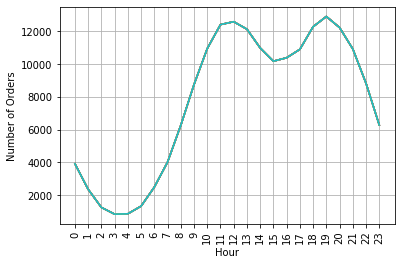

In [265]:
hours = [hour for hour, df in data.groupby('Hour')]

plt.plot(hours, data.groupby(['Hour']).count())
plt.xticks(hours, rotation='vertical')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show();

In [266]:
# Assess where the peaks in the data are. Those peaks are likely to
# be the best times to display advertisements.
# First peak: 12pm
# Second peak: 7pm

In [267]:
# Say we wanted to look at a specific city. Let's select San Francisco.

sf_data = data[data['City'] == ' San Francisco  CA']

In [268]:
sf_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco CA,13,3
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco CA,10,38
17,176573,USB-C Charging Cable,1,11.95,2019-04-27 18:41:00,"214 Chestnut St, San Francisco, CA 94016",4,11.95,San Francisco CA,18,41
29,176584,Flatscreen TV,1,300.00,2019-04-24 20:39:00,"936 Church St, San Francisco, CA 94016",4,300.00,San Francisco CA,20,39
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,0


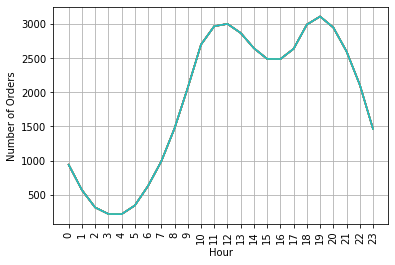

In [269]:
# Use the same plotting technique as above for the San Francisco data.

hours = [hour for hour, df in sf_data.groupby('Hour')]

plt.plot(hours, sf_data.groupby(['Hour']).count())
plt.xticks(hours, rotation='vertical')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show();

In [270]:
# We observe that the optimal times to advertise is consistent with
# what we found across the entire data set.

In [271]:
# Let's take a look at the city with the fewest number of sales,
# Portland, ME.

# Create a separate dataframe.

port_me_data = data[data['City'] == ' Portland  ME']

In [272]:
port_me_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
224,176773,AAA Batteries (4-pack),2,2.99,2019-04-25 20:07:00,"30 9th St, Portland, ME 04101",4,5.98,Portland ME,20,7
337,176879,Flatscreen TV,1,300.00,2019-04-13 14:15:00,"370 Sunset St, Portland, ME 04101",4,300.00,Portland ME,14,15
368,176909,Wired Headphones,1,11.99,2019-04-22 09:53:00,"692 Jackson St, Portland, ME 04101",4,11.99,Portland ME,9,53
537,177072,iPhone,1,700.00,2019-04-01 13:11:00,"682 9th St, Portland, ME 04101",4,700.00,Portland ME,13,11
708,177230,iPhone,1,700.00,2019-04-06 00:26:00,"16 River St, Portland, ME 04101",4,700.00,Portland ME,0,26


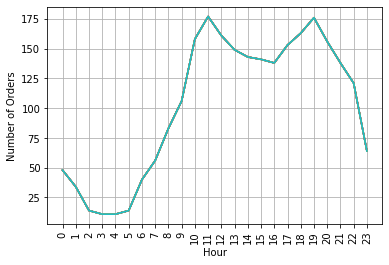

In [273]:
hours = [hour for hour, df in port_me_data.groupby('Hour')]

plt.plot(hours, port_me_data.groupby(['Hour']).count())
plt.xticks(hours, rotation='vertical')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show();

In [274]:
# First peak: 11am
# Second peak: 7pm

### Question 4

#### What products are most often sold together?

In [275]:
# The Order ID column will probably be the most helpful.

# We want to look for duplicate order ids. This will help us determine
# what products were ordered together.

# Create a new dataframe and check for duplicate data.

dup_order_id_data = data[data['Order ID'].duplicated(keep=False)]

dup_order_id_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11,7


In [276]:
# Create a new column where we can get the products with the same 
# order id on the same line.

dup_order_id_data['Grouped Product'] = dup_order_id_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/home/tcbic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [277]:
dup_order_id_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Grouped Product
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [278]:
dup_order_id_data = dup_order_id_data[['Order ID', 'Grouped Product']].drop_duplicates()

In [279]:
dup_order_id_data.head()

,Order ID,Grouped Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [280]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup_order_id_data['Grouped Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # 2 for number of products bought together
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Question 5

#### What product sold the most? Why do you think it sold the most?

In [281]:
product_df = data.groupby('Product')

product_df.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minutes
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


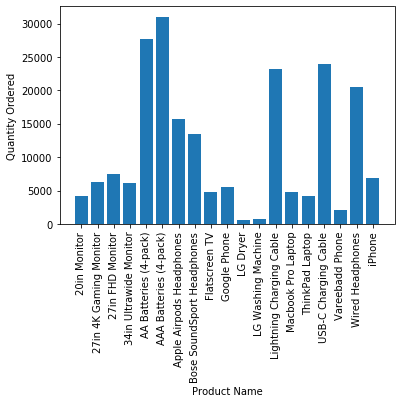

In [282]:
quantity_ordered = product_df.sum()['Quantity Ordered']

products = [product for product, df in product_df]


# Create a plot.

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical')
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.show();

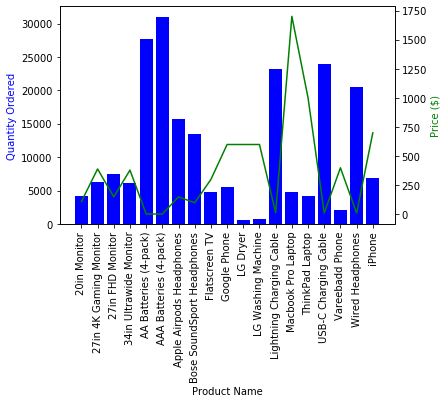

In [288]:
# Add the mean price for each product above.

prices = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='b')
ax2.plot(products, prices, 'g-')

ax1.set_xticklabels(products, rotation='vertical')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='g')

plt.show()

In [ ]:
# A lower price resulted in a higher quantity ordered.